# **Importing data**





In [234]:
import numpy as np
import pandas as pd




In [235]:
sms=pd.read_csv("spam.csv",encoding="latin-1")
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [236]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms=sms.rename(columns={"v1":"Label","v2":"Text"})
sms["Length"]=sms["Text"].apply(len)
sms.head()

,Label,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# **Exploring data**

In [237]:
sms.duplicated().sum()



403

In [238]:
sms= sms.drop_duplicates()


In [239]:
sms.shape

(5169, 3)

In [240]:
sms.columns

Index(['Label', 'Text', 'Length'], dtype='object')

In [241]:
print("Number of rows:",len(sms))

Number of rows: 5169


In [242]:
sms.isnull().sum()

Label     0
Text      0
Length    0
dtype: int64

In [243]:
sms.Label.value_counts()

ham     4516
spam     653
Name: Label, dtype: int64

# 0->**Not spam**
#1->**Spam**




In [244]:
sms.loc[:,"Label"]=sms.Label.map({"ham":0,"spam":1})
sms.head()

,Label,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# **Plot**

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

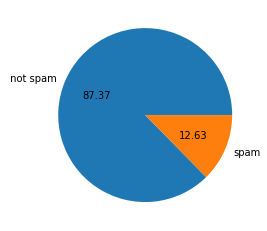

In [246]:
plt.pie(sms['Label'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

<Axes: xlabel='Length', ylabel='Count'>

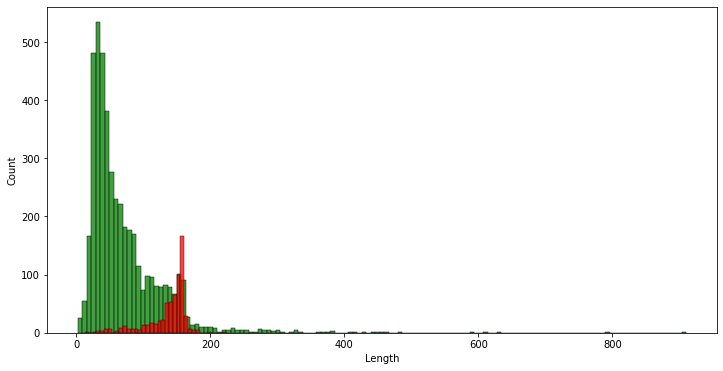

In [247]:
plt.figure(figsize=(12,6))
sns.histplot(sms['Length'][sms['Label']==0],color='green')
sns.histplot(sms['Length'][sms['Label']==1],color = 'red')

# **Implementing Classification**

In [248]:
sms.head()

,Label,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [249]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test =train_test_split(sms["Text"],sms["Label"],test_size=0.25)

In [250]:
x_train

1731    Lol. Well quality aint bad at all so i aint co...
1469    7 wonders in My WORLD 7th You 6th Ur style 5th...
5040    She ran off with a younger man. we will make p...
894     Doesn't g have class early tomorrow and thus s...
2240                       K I'll call you when I'm close
                              ...                        
1919    Yar i wanted 2 scold u yest but late already.....
3119            Good evening! this is roger. How are you?
2602                  So when you gonna get rimac access 
1666    Guess who spent all last night phasing in and ...
2993    No idea, I guess we'll work that out an hour a...
Name: Text, Length: 3876, dtype: object

In [251]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(lowercase=True,stop_words='english')


In [252]:
x_train_transformed=cv.fit_transform(x_train)
x_test_transformed=cv.transform(x_test)

In [253]:
x_train_transformed

<3876x7096 sparse matrix of type '<class 'numpy.int64'>'
	with 29831 stored elements in Compressed Sparse Row format>

In [254]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [255]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [256]:
gnb.fit(x_train_transformed.toarray(),y_train)
y_pred1=gnb.predict(x_test_transformed.toarray())
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Gaussian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))



Accuracy score of Gaussian NB is:  0.8917246713070379
Confusion Matrix of Gaussian NB is:  [[1009  117]
 [  23  144]]
Precision score of the Gaussian NB is 0.5517241379310345


In [257]:
mnb.fit(x_train_transformed.toarray(),y_train)
y_pred2=mnb.predict(x_test_transformed.toarray())
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9837587006960556
Confusion Matrix of Multinomial NB is:  [[1119    7]
 [  14  153]]
Precision score of the Multinomial NB is 0.95625


In [258]:
bnb.fit(x_train_transformed,y_train)
y_pred3=bnb.predict(x_test_transformed.toarray())
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9644238205723125
Confusion Matrix of Bernoulli NB is:  [[1126    0]
 [  46  121]]
Precision score of the Bernoulli NB is 1.0


# **Building Predictive system**

In [259]:
input="""



"""

input_transformed=(cv.transform([input]))
prediction=mnb.predict(input_transformed)
print(prediction)

if (prediction[0]== 0):
  print('It is not a spam message')
else:
  print('It is a spam message')

[0]
It is not a spam message
